In [1]:
#!pip install qulacs
#!pip install matplotlib
#!pip install numpy
#!pip install scipy
from utility import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time 
import random
from qulacs import QuantumState
from qulacs import QuantumCircuit
from qulacs.gate import DenseMatrix
from qulacs.circuit import QuantumCircuitOptimizer

#  Qulacsの基本的な使い方





## QuantumStateクラス：量子状態の取扱

- 量子状態の確保
- 初期化：`set_zero_state()`
- 状態ベクトルをarrayとして書き出し：`get_vecot()`
- 状態のコピー：`copy()`
- 計算基底でのサンプリング：`sampling()`

### 量子ビットの確保

In [23]:
from qulacs import QuantumState
nqubits = 5
state = QuantumState(nqubits)

また、確保した量子ビットをすべて0状態、$|00...0\rangle$へと初期化は `set_zero_state()`で行うことができる。

In [24]:
state.set_zero_state()

### 状態ベクトルを `array` として書き出し
量子状態を取得し、`array`として格納するには、`get_vector()`を使う。

In [25]:
state_array = state.get_vector()
print(state_array)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]


逆に`array`から状態をロードすることも可能

In [26]:
my_vector = [ 1.2345 for i in range(2**nqubits)]
state.load(my_vector)
print(state)

 *** Quantum State ***
 * Qubit Count : 5
 * Dimension   : 32
 * State vector : 
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)
(1.2345,0)



### 特殊な初期状態の指定
ゼロ状態への初期化以外にも、ビット列を指定した初期化、`set_computational_basis()`、や、ランダムな量子状態の準備、`set_Haar_random_state()`、などの準備を行う関数も用意されている。

In [27]:
state.set_computational_basis(0b10101)
print(state.get_vector()[0b10101])

(1+0j)


`utility.py` （いつも使う便利な関数）にある確率分布を表示させる関数 `show_distribution` を使ってみよう。計算基底に関する測定確率の分布は、

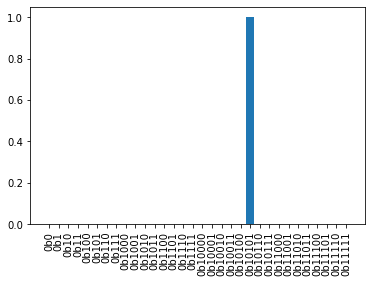

In [28]:
show_distribution(state)

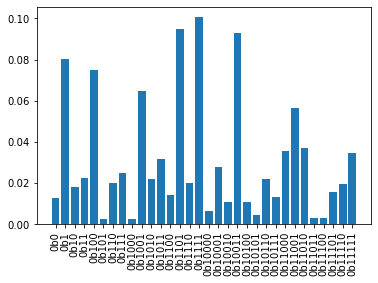

In [29]:
seed = 0
state.set_Haar_random_state(seed)
show_distribution(state)

### 計算基底でのサンプリング
`sampling(shots)` で `shots` 回の計算基底でのサンプリングを実行できる。実行結果はサンプリング結果のビット列を整数化したリストとして得られる。

In [10]:
shots = 10
state.sampling(shots)

[20, 1, 19, 15, 3, 25, 19, 15, 31, 22]

　量子状態のために確保したメモリの解放は、`del`から行うことができる。

In [11]:
del state
state

NameError: name 'state' is not defined

### 状態のコピーと内積
qulacsには他にも、量子状態のコピーや、

In [12]:
state = QuantumState(nqubits)
copied_state = state.copy()

２つの量子状態の内積の計算、

In [13]:
from qulacs.state import inner_product
inner_product(copied_state,state)
#同じ状態の内積なので1になる。

(1+0j)

## 量子演算とその実行
- 様々な量子演算
- 量子演算による状態の更新：`update_quantum_state()`

　量子演算の生成は、`gate`に関するモジュールを用いて実行する。パウリ演算やアダマール演算、CNOT演算など、よく使う基本演算はあらかじめ定義されている。また、自分で定義した配列から、量子演算を生成することもできる。

In [14]:
from qulacs import QuantumState
from qulacs.gate import Identity, X,Y,Z #パウリ演算子
from qulacs.gate import H,S,Sdag, sqrtX,sqrtXdag,sqrtY,sqrtYdag #1量子ビット Clifford演算
from qulacs.gate import T,Tdag #1量子ビット 非Clifford演算
from qulacs.gate import RX,RY,RZ #パウリ演算子についての回転演算
from qulacs.gate import CNOT, CZ, SWAP #2量子ビット演算

`Identity` $
=
\left(
\begin{array}{cc}
1 & 0
\\
0 & 1
\end{array}
\right)
$, 
`X` $
= 
\left(
\begin{array}{cc}
0 & 1
\\
1 & 0
\end{array}
\right)
$, 
`Y` $
=
\left(
\begin{array}{cc}
0 & -i
\\
i & 0
\end{array}
\right)
$, 
`Z` $
=
\left(
\begin{array}{cc}
1 & 0
\\
0 & -1
\end{array}
\right)
$, 


`H` $
=
\frac{1}{\sqrt{2}}\left(
\begin{array}{cc}
1 & 1
\\
1 & -1
\end{array}
\right)
$, 
`S` $
=
\left(
\begin{array}{cc}
1 & 0
\\
0 & i
\end{array}
\right)
$,
`Sdag` $
=
\frac{1}{\sqrt{2}}\left(
\begin{array}{cc}
1 & 0
\\
0 & -i
\end{array}
\right)
$,


`sqrtX` $
=\sqrt{X}=
\frac{1}{2}\left(
\begin{array}{cc}
1+i & 1-i
\\
1-i & 1+i
\end{array}
\right)
$, 
`sqrtXdag` $
=\sqrt{X}^{\dagger}=
\frac{1}{2}\left(
\begin{array}{cc}
1-i & 1+i
\\
1+i & 1-i
\end{array}
\right)
$, 

`sqrtY` $
=\sqrt{Y}=
\frac{1}{2}\left(
\begin{array}{cc}
1+i & -1-i
\\
1+i & 1+i
\end{array}
\right)
$, 
`sqrtYdag` $
=\sqrt{Y}^{\dagger}=
\frac{1}{2}\left(
\begin{array}{cc}
1-i & -1+i
\\
1-i & 1-i
\end{array}
\right)
$

`T` 
$
= 
\left(
\begin{array}{cc}
1 & 0
\\
0 & e^{i \pi/4}
\end{array}
\right)
$, 
`Tdag` 
$=
\left(
\begin{array}{cc}
1 & 0
\\
0 & e^{-i \pi/4}
\end{array}
\right)
$


`RX` $= e^{i (\theta/2) X}$, `RY` $= e^{i (\theta/2) Y}$, `RZ` $= e^{i (\theta/2) Z}$

`CNOT` $= \left(
\begin{array}{cccc}
    1 & 0& 0& 0
    \\
    0 & 1& 0& 0
    \\
    0 & 0& 0& 1
    \\
    0 & 0& 1& 0    
\end{array}
\right)
$,
`CZ` $= \left(
\begin{array}{cccc}
    1 & 0& 0& 0
    \\
    0 & 1& 0& 0
    \\
    0 & 0& 1& 0
    \\
    0 & 0& 0& -1    
\end{array}
\right)
$,
`SWAP` $= \left(
\begin{array}{cccc}
    1 & 0& 0& 0
    \\
    0 & 0& 1& 0
    \\
    0 & 1& 0& 0
    \\
    0 & 0& 0& 1    
\end{array}
\right)
$

他にも、多体のパウリ演算、`Pauli`、多体パウリ演算による回転、`PauliRotation`、IBMQで利用されている`U1`,`U2`,`U3`演算や、測定、`Measurement`、ノイズ（確率的な演算）、 `BitFlipNoise`、`DephasingNoise`、 `IndepenedentXZNoise`、`DepolarizingNoise`なども用意されている。これらの事前に定義された演算に対して、量子ビットのインデックスや、回転演算の角度など必要な情報を引数として指定することによってが`gate`が生成される。生成された演算を状態に作用させ状態`state`を更新するときは、`gate.update_quantum_state(state)`が利用できる。

### 量子状態の更新の例

In [15]:
state = QuantumState(3) #量子ビットの状態確保
state.set_zero_state() #状態をすべてゼロに初期化
print(state.get_vector()) #状態の情報を取得

X(0).update_quantum_state(state) #0番目の量子ビットにXを作用させ状態をアップデート
print(state.get_vector())

gate = X(1) #1番目の量子ビットに作用するX演算を生成
gate.update_quantum_state(state) #生成した演算を作用させて状態をアップデート
print(state.get_vector())

H(2).update_quantum_state(state) #2番目の量子ビットにHを作用させ状態をアップデート
print(state.get_vector())

CNOT(2,1).update_quantum_state(state) #2番目から1番目の量子ビットへのCNOTを作用させ状態をアップデート
print(state.get_vector())

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
[0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j
 0.        +0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


### 回転演算
`RX`、`RY`,`RZ`などの回転演算は、作用する量子ビットのインデックスと回転角を与えて定義する。

In [16]:
state = QuantumState(1)
state.set_zero_state()
RY(0,np.pi/4.0).update_quantum_state(state) #0番目の量子ビットをY軸に pi/4 回転させる
print(state.get_vector())

[ 0.92387953+0.j -0.38268343+0.j]


### 自分で定義した演算を実行
`DenseMatrix`を用いて、自分で定義した一般の行列から演算を作ることもできる。

In [17]:
from qulacs.gate import DenseMatrix
import numpy as np
state = QuantumState(1)
state.set_zero_state()
H(0).update_quantum_state(state)

my_matrix = np.array([[0,12345*np.sqrt(2)],[98765*np.sqrt(2),0]]) #任意の行列要素を自分で定義
print(my_matrix)

gate = DenseMatrix(0,my_matrix) #定義した行列から演算を生成
gate.update_quantum_state(state)

print(state.get_vector())

[[     0.          17458.4664275 ]
 [139674.80248778      0.        ]]
[12345.+0.j 98765.+0.j]


複数の量子ビットに作用する演算を定義したければ、`DenseMatrix("作用する量子ビットのインデックスリスト","行列の配列")`とすればよい。

## 量子回路の構成

上で説明したように、各演算ごとに実行して量子状態を更新することもできるが、複雑な量子回路を構成する場合には、実行する前に量子回路を構成できると便利であろう。qulacsでは、`QuantumCircuit`クラスを用いて、演算の集合からなる回路`circuit`を定義することができる。定義した回路をprintすると、構成された回路の詳細データを得ることができる。

In [18]:
from qulacs import QuantumCircuit
nqubits = 2
state = QuantumState(nqubits)
state.set_zero_state()
circuit = QuantumCircuit(nqubits)
print(circuit)

*** Quantum Circuit Info ***
# of qubit: 2
# of step : 0
# of gate : 0
Clifford  : yes
Gaussian  : yes




回路への、演算の追加は、以下のような方法で行うことができる。

In [19]:
circuit.add_H_gate(0) # 0番目の量子ビットに作用するHを追加
circuit.add_gate(H(1)) # 1番目の量子ビットに作用するHを追加
print(circuit)

*** Quantum Circuit Info ***
# of qubit: 2
# of step : 1
# of gate : 2
# of 1 qubit gate: 2
Clifford  : yes
Gaussian  : no




このようにして構成された`circuit`を実行して`state`の更新を行いたければ、`gate`の場合と同様に、
`circuit.update_quantum_state(state)`とすればよい。

In [20]:
circuit.update_quantum_state(state) #構成されたcircuitを実行して状態を更新
print(state.get_vector())

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


## Qulacsの計算速度を体感
    一通り、導入が終わったので、qulacsの実行速度を計測してみよう。まずは、一量子ビットの実行時間を計測してみる。

In [21]:
import time

for i in range(21):
    nqubits = i+5
    state = QuantumState(nqubits)
    state.set_zero_state()
    circuit = QuantumCircuit(nqubits)
    for j in range(nqubits):
        circuit.add_gate(H(j)) #全部の量子ビットにHを作用させる回路を構成
    
    count = 0
    
    #計測スタート
    start = time.time()
    while time.time() - start < 1:
        count = count+1
        circuit.update_quantum_state(state)
    elapsed_time = (time.time() - start)/(count*nqubits)
    #計測終了
    
    print ("number of qubit:{0}".format(nqubits)+" time:{0}".format(elapsed_time) + "[sec]")

number of qubit:5 time:2.4237899354494503e-07[sec]
number of qubit:6 time:2.3159937673311186e-07[sec]
number of qubit:7 time:2.893230294462022e-07[sec]
number of qubit:8 time:4.1765302318891486e-07[sec]
number of qubit:9 time:7.351803485920295e-07[sec]
number of qubit:10 time:1.365975817231295e-06[sec]
number of qubit:11 time:2.651433423535066e-06[sec]
number of qubit:12 time:5.230701651091515e-06[sec]
number of qubit:13 time:9.53681519112465e-06[sec]
number of qubit:14 time:1.783984796592916e-05[sec]
number of qubit:15 time:2.9040767479164398e-05[sec]
number of qubit:16 time:5.453886109912999e-05[sec]
number of qubit:17 time:0.00010942503005077196[sec]
number of qubit:18 time:0.0003791194203579327[sec]
number of qubit:19 time:0.0010078706239399157[sec]
number of qubit:20 time:0.002107239266236623[sec]
number of qubit:21 time:0.003983589319082407[sec]
number of qubit:22 time:0.007959391131545559[sec]
number of qubit:23 time:0.015531989111416582[sec]
number of qubit:24 time:0.0297020723

## Observable クラス
`add_operator`で係数とパウリ演算子のタイプ、そして量子ビットのindexを指定して追加

In [30]:
measurement = Observable(nqubits)
measurement.add_operator(1.0,"Z 0")
# utility.pyにある関数をつかって中身を表示
show_observable(measurement)

(1+0j) Z0


期待値の計算は、`get_expectation_value(state)`

In [31]:
nqubits = 1
state = QuantumState(nqubits)
measurement.get_expectation_value(state)

0.0

In [33]:
nqubits = 10
state =QuantumState(nqubits)
state.set_Haar_random_state()

measurement = Observable(nqubits)
measurement.add_operator(1.0,"Z 0 Z 1 Z 2 Z 3 Z 4 Z 5 Z 6 Z 7 Z 8 Z 9")
show_observable(measurement)

measurement.get_expectation_value(state)

(1+0j) Z0 Z1 Z2 Z3 Z4 Z5 Z6 Z7 Z8 Z9


-0.07306928176869981